# Metavers NLP Project

Team: **Mijail Mariano**, **Meredith Wang**, **Brad Gauvin**

August 2022

<a href="#"><img align="left" alt="Python" src="https://img.shields.io/badge/Python-013243.svg?logo=python&logoColor=white"></a>
<a href="#"><img align="left" alt="Pandas" src="https://img.shields.io/badge/Pandas-150458.svg?logo=pandas&logoColor=white"></a>
<a href="#"><img align="left" alt="NumPy" src="https://img.shields.io/badge/Numpy-2a4d69.svg?logo=numpy&logoColor=white"></a>
<a href="#"><img align="left" alt="Matplotlib" src="https://img.shields.io/badge/Matplotlib-8DF9C1.svg?logo=matplotlib&logoColor=white"></a>
<a href="#"><img align="left" alt="seaborn" src="https://img.shields.io/badge/seaborn-65A9A8.svg?logo=pandas&logoColor=white"></a>

<h1 align="center">------------ 🏘️ Project Goal ------------</h1>

Use README.md text to learn the primary programming language used in "Metaverse" related repos and associated topics. Design an NLP predictive model that accurately identifies the *[programming language]* * used in "metaverse" related repos. 

*The predicted programming language used in this analysis is the primary (in overall repo percentage) that is found in the GitHub repository searched.* *

<h1 align="center">------------ 🧮 Acquire Data ------------</h1>

## 1. Data Acquisition
▪️ This is accomplished via the python script named “acquire.py”. The script will use credentials (stored in env.py) to collect data from GitHub.com in various ways

▪️ First, scrape "URLs", or Repository names, so that the subsequent acquisition function will be able to seek out those repositories. Store the names of the repositories in a `metaverse.csv` file.

▪️ Once the list of repositories is collected, use functions from the acquire script to collect the following information from those repositories, including:

In [1]:
# notebook dependencies 
# install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install xgboost

# used in caching
import os 
import pandas as pd
import numpy as np

# visualization imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# regular expression import
import re

# JSON import
import json

# importing BeautifulSoup for parsing HTML/XTML
from bs4 import BeautifulSoup as BSoup

# request module for connecting to APIs
from requests import get

# text prepare modules
import acquire
import prepare

# uni-code library
import unicodedata

# natural language toolkit library/modules
import nltk
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer

from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

#sklearn
from sklearn.model_selection import train_test_split

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# sklearn
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# modeling modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# XGBoost classifier
from xgboost import XGBClassifier

In [2]:
# pulling in the acquire df

df = pd.read_csv("metaverse.csv")

In [3]:
# df info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             998 non-null    object
 1   language         682 non-null    object
 2   readme_contents  741 non-null    object
dtypes: object(3)
memory usage: 23.5+ KB


In [4]:
# specifying the column dtypes

df = df[["repo", "language", "readme_contents"]].astype(str)

## 2. Data Preparation - Data Cleaning 🧹 
▪️ **Missing Values (NaN):**
    
- All the null language/readme values are <span style="color: blue"> **converted to `text`** </span>

▪️ **Data Conversion**
- Convert `readme` to `leaned`, `stemmed` and `lemmatized`


In [5]:
# viewing the clean/tokenize/stem/lemmatization process

df["clean"] = df["readme_contents"].apply(prepare.basic_clean).apply(prepare.tokenize).apply(prepare.remove_stopwords, include_words = ["metaverse", "Metaverse", "meta-verse", "Meta-verse", "meta verse", "Meta Verse", "Meta verse"])
df["stemmed"] = df["clean"].apply(prepare.porter_stem)
df["lemmatized"] = df["clean"].apply(prepare.lemmatize)

df.head(20)

,repo,language,readme_contents,clean,stemmed,lemmatized
0,M3-org/awesome-metaverse,nan,# Awesome Metaverse [![Awesome](https://awesom...,awesome awesome https awesome badge svg https ...,awesom awesom http awesom badg svg http awesom...,awesome awesome http awesome badge svg http aw...
1,mvs-org/metaverse,C++,Metaverse Core Integration/staging Tree\n=====...,core integration staging tree build status htt...,core integr stage tree build statu http travi ...,core integration staging tree build status htt...
2,webaverse/app,JavaScript,"<img src=""docs/banner.jpeg"" width=100% />\n\n<...",img src docs banner jpeg width 100 align cente...,img src doc banner jpeg width 100 align center...,img src doc banner jpeg width 100 align center...
3,shadowcz007/awesome-metaverse,nan,"# awesome-metaverse\n<a href=""https://awesome....",awesome href https awesome target blank img al...,awesom href http awesom target blank img alt a...,awesome href http awesome target blank img alt...
4,vircadia/vircadia,C++,"<p align=""center""><a href=""https://vircadia.co...",align center href https vircadia img src inter...,align center href http vircadia img src interf...,align center href http vircadia img src interf...
5,AI4Finance-Foundation/FinRL-Meta,Jupyter Notebook,# FinRL-Meta: A Universe of Market Environment...,finrl meta universe market environments benchm...,finrl meta univers market environ benchmark da...,finrl meta universe market environment benchma...
6,bit-country/Metaverse-Network,Rust,"<p align=""center"">\n <img src=""https://github...",align center img src https bit country network...,align center img src http bit countri network ...,align center img src http bit country network ...
7,omigroup/omigroup,nan,# Open Metaverse Interoperability Group (OMI)\...,open interoperability group omi club https img...,open interoper group omi club http img shield ...,open interoperability group omi club http img ...
8,joaneeet7/Metaverse,JavaScript,nan,nan,nan,nan
9,houbb/awesome-metaverse-zh,Batchfile,# Awesome Metaverse [![Awesome](https://awesom...,awesome awesome https awesome badge svg https ...,awesom awesom http awesom badg svg http awesom...,awesome awesome http awesome badge svg http aw...


In [6]:
# Cleaned Data function
df = pd.read_csv("metaverse.csv")

df = prepare.clean_data_objects(df)
df.head() # checks out!

df shape: (998, 3)


,repo,language,readme_contents
0,M3-org/awesome-metaverse,nan,# Awesome Metaverse [![Awesome](https://awesom...
1,mvs-org/metaverse,C++,Metaverse Core Integration/staging Tree\n=====...
2,webaverse/app,JavaScript,"<img src=""docs/banner.jpeg"" width=100% />\n\n<..."
3,shadowcz007/awesome-metaverse,nan,"# awesome-metaverse\n<a href=""https://awesome...."
4,vircadia/vircadia,C++,"<p align=""center""><a href=""https://vircadia.co..."


In [7]:
# using the mass_text_clean function

df["readme_contents"] = df["readme_contents"].apply(prepare.mass_text_clean)
df.head() # check outs

,repo,language,readme_contents
0,M3-org/awesome-metaverse,nan,awesome awesome awesome badge svg awesome list...
1,mvs-org/metaverse,C++,core integration staging tree build status tra...
2,webaverse/app,JavaScript,img src doc banner jpeg width 100 align center...
3,shadowcz007/awesome-metaverse,nan,awesome href awesome target blank img alt awes...
4,vircadia/vircadia,C++,align center href vircadia img src interface r...


In [8]:
# Add word count
df['word_count']=df.readme_contents.str.split().str.len()
df

,repo,language,readme_contents,word_count
0,M3-org/awesome-metaverse,nan,awesome awesome awesome badge svg awesome list...,1552
1,mvs-org/metaverse,C++,core integration staging tree build status tra...,555
2,webaverse/app,JavaScript,img src doc banner jpeg width 100 align center...,420
3,shadowcz007/awesome-metaverse,nan,awesome href awesome target blank img alt awes...,1588
4,vircadia/vircadia,C++,align center href vircadia img src interface r...,432
...,...,...,...,...
993,LinasKo/MetaVerse,C#,virtual conference project meataswitch vacatho...,17
994,saiva11/Metaverse,Vue,nan,1
995,dimplehh/metaverse,nan,vps sdk vps asset maxstar vps vpsstudio path n...,575
996,niksanvijan/MetaVerse,nan,nan,1


### Looking to categorize some of the categories.
- Multiple "C" languages
- Multiple names for similar languages (Jupyternotebook/python, Powershell/Shell)

In [9]:
df=prepare.update_languages(df)

<h1 align="center">------------ 👩🏻‍💻 Exploratory Analysis ------------</h1>

### Answer the following questions using data visualization and statistical testing:

1. What are the most common words in the README files by language?
2. Does the length of the README file vary by language?
3. Are bigrams from the README useful for determining which language the repository belongs to?

#### Start with Splitting Data

In [10]:
train, validate, test = prepare.train_validate_test_split(df, 'language')

train shape: (558, 4)
validate shape: (240, 4)
test shape: (200, 4)


In [11]:
train.head()

,repo,language,readme_contents,word_count
624,Spectruth/Metaverse,text,text,1
0,M3-org/awesome-metaverse,text,awesome awesome awesome badge svg awesome list...,1552
643,flynnhandley/metaverse,other,h1 align center img src 124135 361502 raikfcqu...,456
181,GoMeta/leaderboard,other,leaderboard sample project repository contains...,320
750,qxl0/metaverse,Java,next tailwind cs show tailwind cs tailwindcss ...,131


### Question: What are the most common words in the 'README's?

In [12]:
# Isolate words by type/frequency
java_words = (' '.join(train.readme_contents[train.language == 'Java'])).split()
python_words = (' '.join(train.readme_contents[train.language == 'Python'])).split()
c_words = (' '.join(train.readme_contents[train.language == 'C'])).split()
html_words = (' '.join(train.readme_contents[train.language == 'HTML'])).split()
type_words = (' '.join(train.readme_contents[train.language == 'TypeScript'])).split()
other_words = (' '.join(train.readme_contents[train.language == 'other'])).split()
solidity_words = (' '.join(train.readme_contents[train.language == 'Solidity'])).split()
css_words = (' '.join(train.readme_contents[train.language == 'CSS'])).split()
rust_words = (' '.join(train.readme_contents[train.language == 'Rust'])).split()
go_words = (' '.join(train.readme_contents[train.language == 'Go'])).split()
all_words = (' '.join(train.readme_contents)).split()

java_freq = pd.Series(java_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
c_freq = pd.Series(c_words).value_counts()
html_freq = pd.Series(html_words).value_counts()
type_freq = pd.Series(type_words).value_counts()
other_freq = pd.Series(other_words).value_counts()
solidity_freq = pd.Series(solidity_words).value_counts()
css_freq = pd.Series(css_words).value_counts()
rust_freq = pd.Series(rust_words).value_counts()
go_freq = pd.Series(go_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [13]:
# concatonate words for count
word_counts = (pd.concat([all_freq, java_freq, python_freq, c_freq, html_freq, type_freq, other_freq, solidity_freq, css_freq, rust_freq, go_freq], axis=1, sort=True)
              .set_axis(['all','Java', 'Python', 'C', 'HTML','TypeScript','other','Solidity','CSS','Rust', 'Go'], axis=1, inplace=False)
              .fillna(0)
              .apply(lambda s: s.astype(int)))

In [14]:
# Pring word counts
print('java words: ' + str(len(java_words)))
print('python words: ' + str(len(python_words)))
print('c words: ' + str(len(c_words)))
print('html words: ' + str(len(html_words)))
print('type words: ' + str(len(type_words)))
print('other words: ' + str(len(other_words)))
print('solidity words: ' + str(len(solidity_words)))
print('css words: ' + str(len(css_words)))
print('rust words: ' + str(len(rust_words)))
print('go words: ' + str(len(go_words)))
print('all words: ' + str(len(all_words)))

java words: 27163
python words: 5186
c words: 10622
html words: 1984
type words: 9112
other words: 4268
solidity words: 2539
css words: 739
rust words: 3356
go words: 517
all words: 136084


### 1 Question: What are the most common words in the 'README's?

In [15]:
# Display Overall top 20 words
word_counts.sort_values(by='all', ascending=False).head(20)

,all,Java,Python,C,HTML,TypeScript,other,Solidity,CSS,Rust,Go
href,2171,132,6,16,0,52,6,0,1,48,0
detail,1997,11,1,26,0,8,2,3,3,3,4
summary,1942,0,0,12,0,0,0,0,0,0,0
git,1181,72,3,27,5,18,4,0,0,5,1
0,1142,679,11,84,6,16,14,30,0,12,2
open,1059,101,79,47,12,26,12,7,5,8,0
13,975,1,2,2,0,0,6,0,0,0,0
img,922,205,34,47,12,93,6,0,10,34,0
project,918,134,6,77,3,68,9,13,4,9,1
2022,806,18,2,5,0,6,1,0,0,0,0


<AxesSubplot:title={'center':'Top 20 Most Common Words in Metaverse READMEs'}, xlabel='Words', ylabel='frequency'>

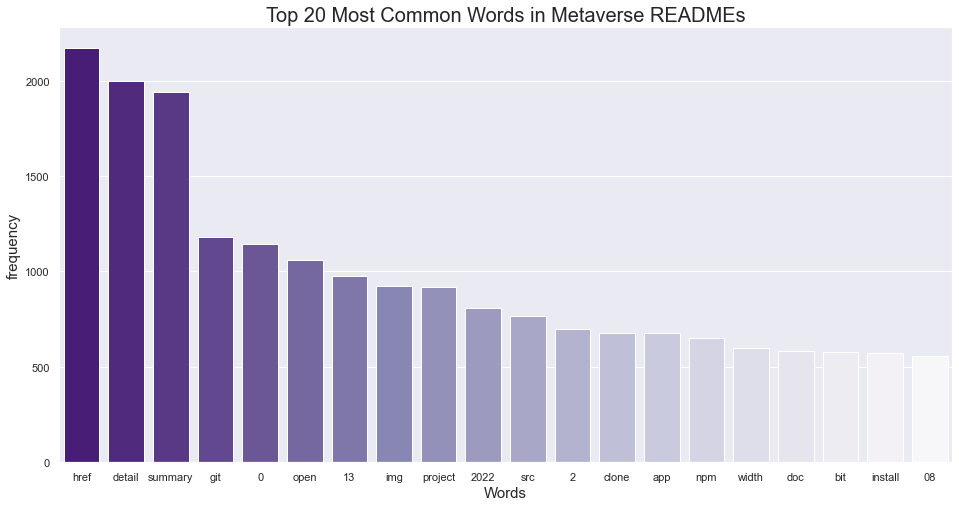

In [16]:
# All content
all_content = ' '.join(train.readme_contents)
# All freq
all_freq = pd.DataFrame(pd.Series((all_content.split())).value_counts().head(20), columns = ['frequency'])
# Visualize most frequent words
plt.figure(figsize = (16,8))
plt.xlabel('Words', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Top 20 Most Common Words in Metaverse READMEs', fontsize = 20)
sns.barplot(x=all_freq.index, y=all_freq.frequency, palette ='Purples_r')

In [17]:
# Define language labels
labels = pd.concat([train.language.value_counts(),
                    train.language.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
text,177,0.317204
Java,159,0.284946
C,57,0.102151
TypeScript,40,0.071685
HTML,40,0.071685
other,22,0.039427
Python,18,0.032258
Solidity,15,0.026882
CSS,13,0.023297
Rust,9,0.016129


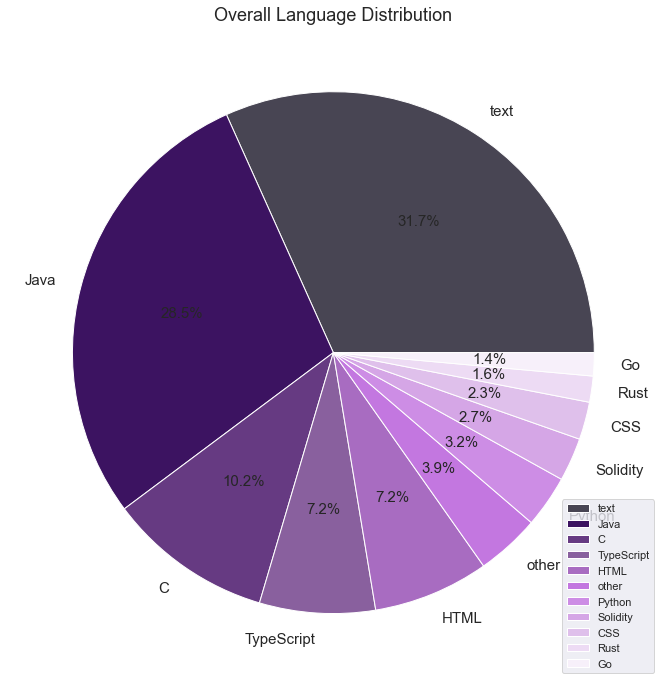

In [18]:
# Pie Graph for languages
plt.figure(figsize=(16,12))
mylabels = ['text', 'Java', 'C', 'TypeScript', 'HTML', 'other', 'Python', 'Solidity',
       'CSS', 'Rust', 'Go']
mycolors = ['#484553', '#3c1361', '#663a82', '#89609e', '#a86cc1', '#c377e0', '#cd8de5', '#d5a6e6', '#dfc0eb', '#eddbf4', '#f7f0fa']
textprops = {"fontsize":15}
plt.pie(labels.percent, labels = mylabels, colors = mycolors, textprops=textprops, autopct='%.1f%%')
plt.legend()
plt.title('Overall Language Distribution',fontsize=18)
plt.show() 

<h3><div class="alert alert-info">Takeaway: '0', 'app', 'doc', 'create', 'img', 'next', 'project', 'run', etc. are the most common words.</div></h3>

## 2 Question: Does the length of the README vary by programming language?

<h3><div class="alert alert-info"> Takeaway:
    
◾ Yes, READMEs length vary by programming language.
    
◾ READMEs that have the longest length on average are Rust, text, Python, typescript, and other.
    
◾ READMEs that have the shortest length on average are HTML, CSS, GO, Java, and Solidity.
</div></h3>

In [19]:
train.head()

,repo,language,readme_contents,word_count
624,Spectruth/Metaverse,text,text,1
0,M3-org/awesome-metaverse,text,awesome awesome awesome badge svg awesome list...,1552
643,flynnhandley/metaverse,other,h1 align center img src 124135 361502 raikfcqu...,456
181,GoMeta/leaderboard,other,leaderboard sample project repository contains...,320
750,qxl0/metaverse,Java,next tailwind cs show tailwind cs tailwindcss ...,131


In [20]:
# Find the readme length by programming language
train.groupby('language').word_count.mean().sort_values(ascending=False)

language
text          398.858757
Rust          372.888889
Python        288.111111
TypeScript    227.800000
other         194.000000
C             186.350877
Java          170.836478
Solidity      169.266667
Go             64.625000
CSS            56.846154
HTML           49.600000
Name: word_count, dtype: float64

In [21]:
# Bar plot function for Vis
def bar_plot(train, target, readme_length):
    '''
    This function is to create a bar plot. Take in dataframe, a target and a feature
    '''
    train.groupby(target)[readme_length].mean().plot.bar()
    plt.title('Mean Readme Lengths by Language')
    plt.ylabel('Readme Length')
    plt.show()

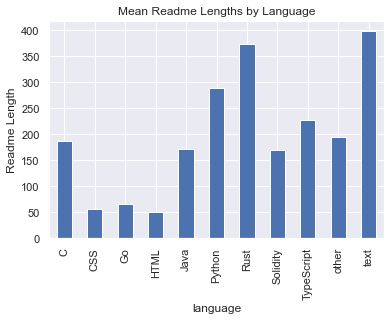

In [22]:
# A visualization of the above outcome
bar_plot(train, 'language', 'word_count')

In [23]:
# import stats
import scipy.stats as stats

In [24]:
def stat_test(train, readme_length):
    '''
    Perform 1 sample t-test comparing mean length of original
    README file per language to the overall average length (all languages)
    set the significance level to 0.05
    '''
    alpha = 0.05
    overall_mean_length_readme = train[readme_length].mean()
    for l in train.language.unique():
        sample = train[train.language == l]
        t,p = stats.ttest_1samp(sample[readme_length], overall_mean_length_readme)
        print(l, round(t,5), p<alpha)

In [25]:
# Perform 1 sample t-test comparing mean length of stemmed README file per language to the overall average length (all languages)
# Set significance level to 0.05
stat_test(train, 'word_count')

text 0.60555 False
other -0.79802 False
Java -3.20998 True
Rust 0.86043 False
Solidity -1.10797 False
Go -4.20069 True
C -1.41064 False
TypeScript -0.43883 False
HTML -6.26624 True
Python 0.25997 False
CSS -9.95221 True


In [26]:
# Concatenate readme content together for each language
text = ' '.join(train[train.language == 'text'].readme_contents)
java = ' '.join(train[train.language == 'Java'].readme_contents)
c = ' '.join(train[train.language == 'C'].readme_contents)
typescript = ' '.join(train[train.language == 'TypeScript'].readme_contents)
html = ' '.join(train[train.language == 'HTML'].readme_contents)
other = ' '.join(train[train.language == 'other'].readme_contents)
python = ' '.join(train[train.language == 'Python'].readme_contents)
solidity = ' '.join(train[train.language == 'Solidity'].readme_contents)
css = ' '.join(train[train.language == 'CSS'].readme_contents)
rust = ' '.join(train[train.language == 'Rust'].readme_contents)
go = ' '.join(train[train.language == 'Go'].readme_contents)

<AxesSubplot:title={'center':'Average README Length by Programming Language'}, xlabel='Programming Language', ylabel='avg_length'>

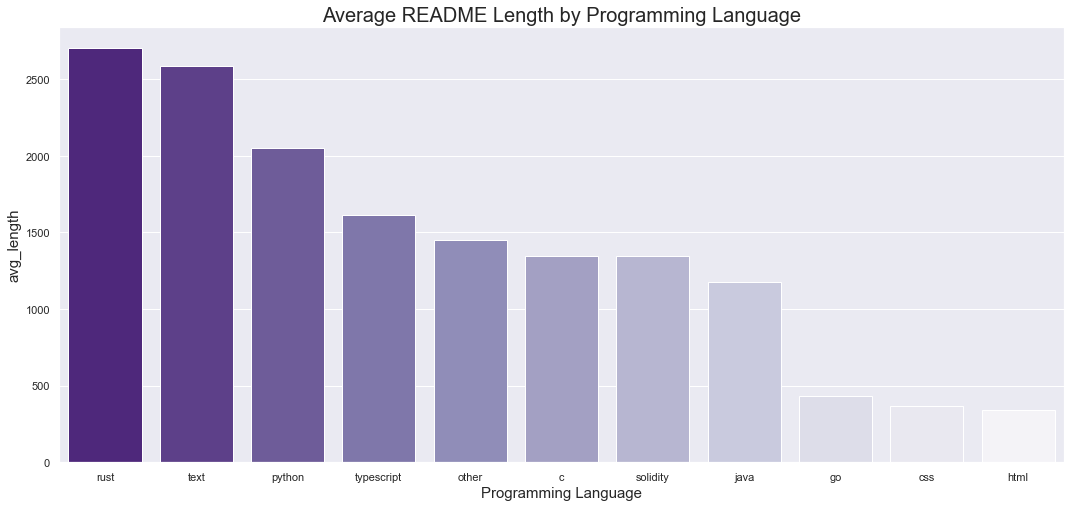

In [27]:
# Putting all language content in a dataframe
language = pd.DataFrame((text,java,c,typescript,html,other,python,solidity, css,rust,go), index =['text', 'java', 'c', 'typescript', 'html', 'other', 'python','solidity', 'css', 'rust', 'go'], columns = ['content'])
# Create length column that represents the total length of the content
language['length'] = language.content.str.len()
# Create count column -> the number of repo of each language
language['count'] = [177, 159, 57, 40, 40, 22, 18, 15, 13, 9, 8]
# Create avg length column represents the avg lenth of readme countent per language
language['avg_length'] = language['length']/language['count']
# Sort dataframe by avg length to show the longest readmes
language = language.sort_values(by ='avg_length', ascending = False)
# Visualize most frequent words
plt.figure(figsize = (18,8))
plt.xlabel('Programming Language', fontsize = 15)
plt.ylabel('Avg README Length', fontsize = 15)
plt.title('Average README Length by Programming Language', fontsize = 20)
sns.barplot(x=language.index, y=language['avg_length'], palette ='Purples_r')

In [28]:
# Box plot
def box_plot(train, target, word_count):
    '''
    Create a boxplot to represent the distributions of the README lengths. Take in a target and a feature
    '''
    sns.boxplot(x= target,y = word_count, data= train, palette='Purples_r')
    plt.title('DIstribution of README length')
    plt.ylim(0, 3500)

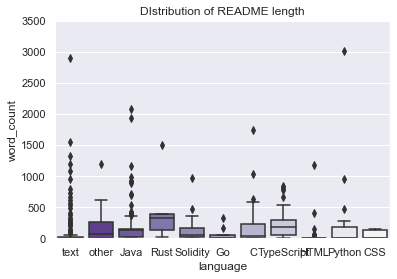

In [29]:
# A boxplot to represent the distributions of the README lengths
box_plot(train, 'language', 'word_count')


### Takeaways

- The readme length varies by programming language
- Rust has the longest average readme length
- There are some outliers with readme lengths over 1,000
- The length of the readme is statistically different from the overall mean for CSS and HTML. Other Languages did not show a statistically significant difference likely due to the high standard deviation.

<h3><div class="alert alert-info"> Takeaway:
    
◾ Yes, READMEs length vary by programming language.
    
◾ READMEs that have the longest length on average are Rust, text, Python, typescript, and other.
    
◾ READMEs that have the shortest length on average are HTML, CSS, GO, Java, and Solidity.
</div></h3>

## Question 3: Do different programming languages use a different number of unique words?

In [30]:
# unique counts function
def unique_counts(word_counts):
    '''
    This function takes our word_counts dataframe and finds the number of uniques to each language and returns them as their own dataframes. 
    '''
    # Adding a column for each language with 1 or 0 (str) to represent if it is unique to that language
    word_counts['unique_p'] = np.where(word_counts['all'] == word_counts['Python'], '1', '0')
    word_counts['unique_j'] = np.where(word_counts['all'] == word_counts['Java'], '1', '0')
    word_counts['unique_c'] = np.where(word_counts['all'] == word_counts['C'], '1', '0')
    word_counts['unique_r'] = np.where(word_counts['all'] == word_counts['Rust'], '1', '0')
    word_counts['unique_h'] = np.where(word_counts['all'] == word_counts['HTML'], '1', '0')
    word_counts['unique_t'] = np.where(word_counts['all'] == word_counts['TypeScript'], '1', '0')
    word_counts['unique_g'] = np.where(word_counts['all'] == word_counts['Go'], '1', '0')
    word_counts['unique_o'] = np.where(word_counts['all'] == word_counts['other'], '1', '0')
    word_counts['unique_s'] = np.where(word_counts['all'] == word_counts['Solidity'], '1', '0')
    word_counts['unique_css'] = np.where(word_counts['all'] == word_counts['CSS'], '1', '0')
    # Getting separate df's for these unique words
    unique_p = word_counts[['Python']][word_counts.unique_p == '1']
    unique_j = word_counts[['Java']][word_counts.unique_j == '1']
    unique_c = word_counts[['C']][word_counts.unique_c == '1']
    unique_r = word_counts[['Rust']][word_counts.unique_p == '1']
    unique_h = word_counts[['HTML']][word_counts.unique_j == '1']
    unique_t = word_counts[['TypeScript']][word_counts.unique_c == '1']
    unique_g = word_counts[['Go']][word_counts.unique_p == '1']
    unique_o = word_counts[['other']][word_counts.unique_j == '1']
    unique_s = word_counts[['Solidity']][word_counts.unique_c == '1']
    unique_css = word_counts[['CSS']][word_counts.unique_c == '1']
    # returning the three dataframes
    return unique_p, unique_j, unique_c, unique_r, unique_h, unique_t, unique_g, unique_o, unique_s, unique_css

In [31]:
# Using our unique_counts() function to get our unique dataframes. Takes our previously acquired word_counts df.
unique_p, unique_j, unique_c, unique_r, unique_h, unique_t, unique_g, unique_o, unique_s, unique_css = unique_counts(word_counts)

In [32]:
len(unique_p), len(unique_j), len(unique_c),len(unique_r), len(unique_h), len(unique_t), len(unique_g), len(unique_o), len(unique_s), len(unique_css) 

(291, 2043, 907, 291, 2043, 907, 291, 2043, 907, 907)

In [33]:
# Text freq
text_freq = pd.DataFrame(pd.Series(text.split()).value_counts().head(20), columns = ['frequency'])
text_freq.head()

,frequency
detail,1936
summary,1930
href,1910
git,1046
13,964


<AxesSubplot:title={'center':"Top 20 Most Common Words for Programming Language 'text'"}, xlabel='Words', ylabel='frequency'>

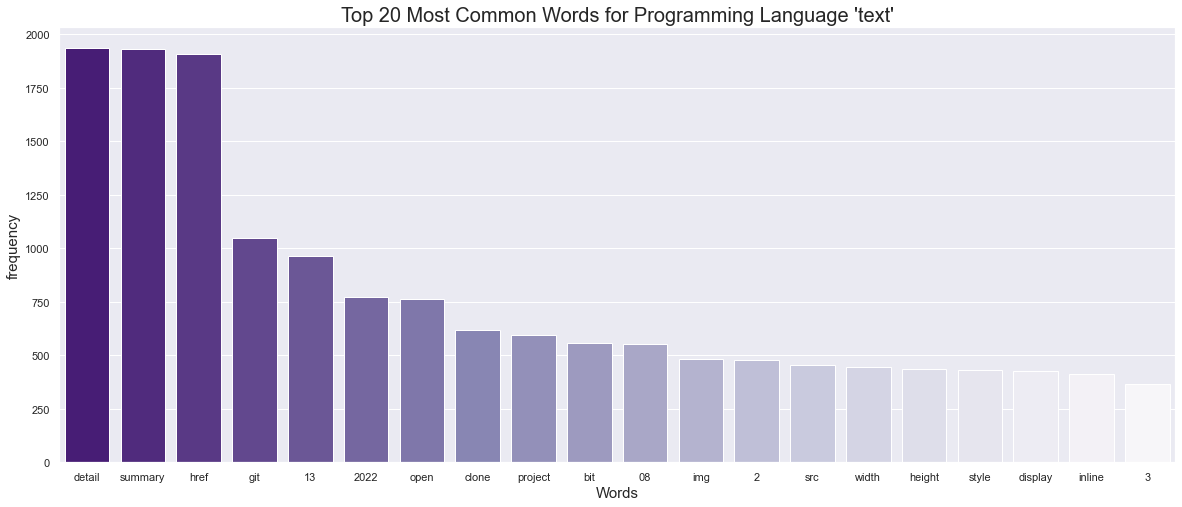

In [34]:
# Visualize most frequent words for text repos
plt.figure(figsize = (20,8))
plt.xlabel('Words', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title("Top 20 Most Common Words for Programming Language 'text'", fontsize = 20)
sns.barplot(x=text_freq.index, y=text_freq.frequency, palette ='Purples_r')

<AxesSubplot:title={'center':"Top 20 Most Common Words for Programming Language 'C'"}, xlabel='Words', ylabel='frequency'>

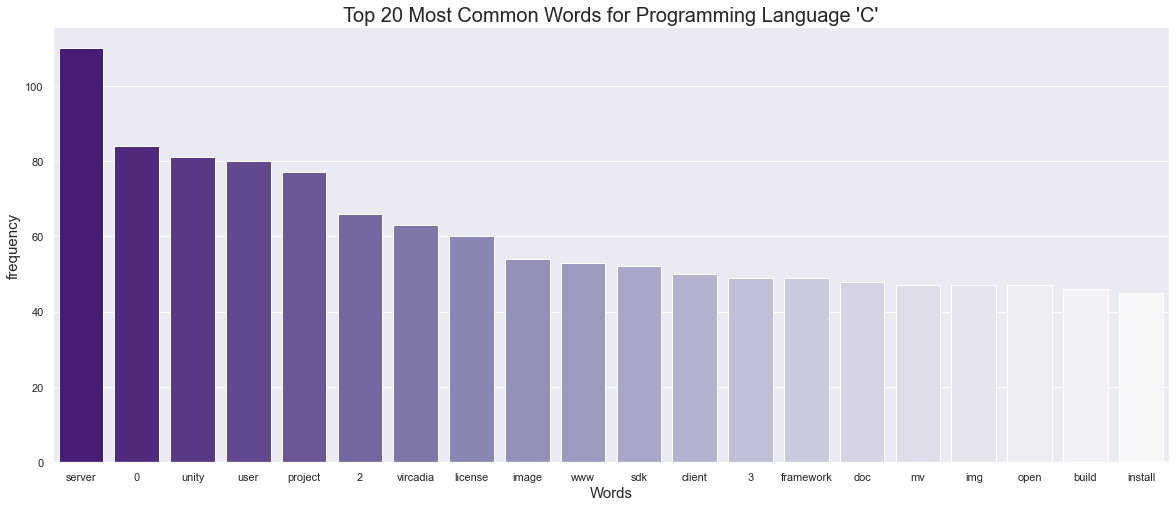

In [35]:
# Visual for C Languages
# Storing frequency into dataframe
c_freq = pd.DataFrame(pd.Series(c.split()).value_counts().head(20), columns = ['frequency'])
# Visualize most frequent words for text repos
plt.figure(figsize = (20,8))
plt.xlabel('Words', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title("Top 20 Most Common Words for Programming Language 'C'", fontsize = 20)
sns.barplot(x=c_freq.index, y=c_freq.frequency, palette ='Purples_r')

<AxesSubplot:title={'center':"Top 20 Most Common Words for Programming Language 'TypeScript'"}, xlabel='Words', ylabel='frequency'>

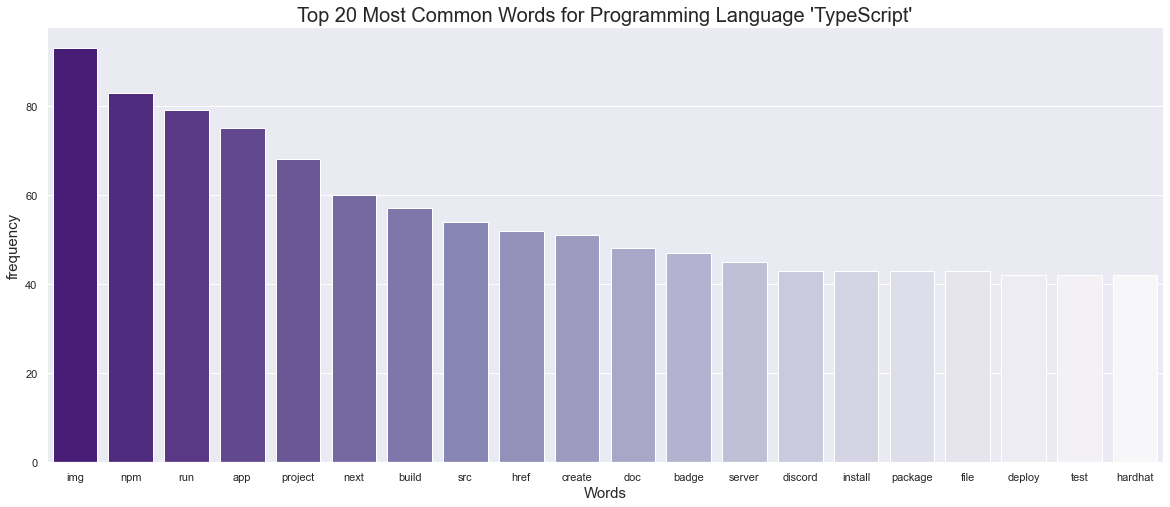

In [36]:
# Vis for typescript
# Storing frequency into dataframe
type_freq = pd.DataFrame(pd.Series(typescript.split()).value_counts().head(20), columns = ['frequency'])
# Visualize most frequent words for text repos
plt.figure(figsize = (20,8))
plt.xlabel('Words', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title("Top 20 Most Common Words for Programming Language 'TypeScript'", fontsize = 20)
sns.barplot(x=type_freq.index, y=type_freq.frequency, palette ='Purples_r')

<h3><div class="alert alert-info">Takeaway: Yes, most common words are unique for each programming language. But there are a few overlap: 'project', 'app', etc.</div></h3>

## Question 4: Are there any words that uniquely identify a programming language?

**Text**

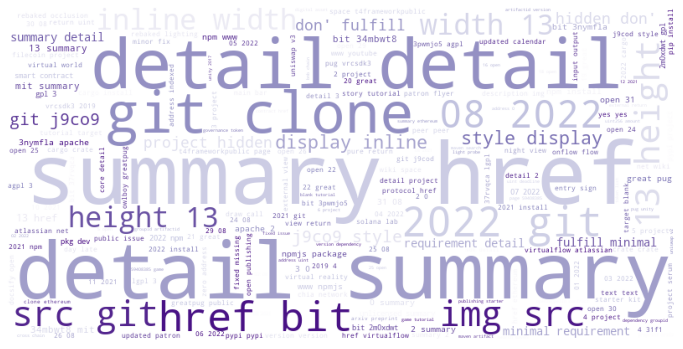

In [37]:
# Storing frequency into series
text_bigrams = pd.Series(nltk.ngrams(text.split(),2)).value_counts()
data = {k[0] + ' ' + k[1]: v for k, v in text_bigrams.to_dict().items()}
# Using wordcloud to visualize most common words
img = WordCloud(background_color='white', width=800, height=400, colormap = 'Purples_r').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

#### 🔸	Java

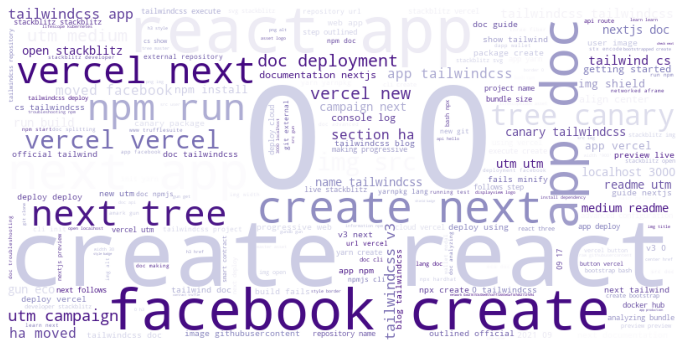

In [38]:
# Storing frequency into series
java_bigrams = pd.Series(nltk.ngrams(java.split(),2)).value_counts()
data = {k[0] + ' ' + k[1]: v for k, v in java_bigrams.to_dict().items()}
# Using wordcloud to visualize most common words
img = WordCloud(background_color='white', width=800, height=400, colormap = 'Purples_r').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

#### 🔸 C

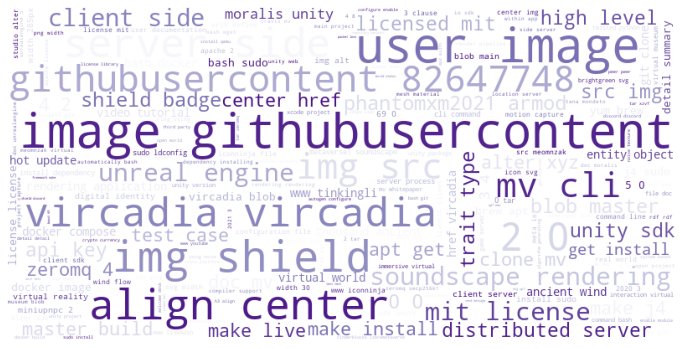

In [39]:
# Storing frequency into series
c_bigrams = pd.Series(nltk.ngrams(c.split(),2)).value_counts()
data = {k[0] + ' ' + k[1]: v for k, v in c_bigrams.to_dict().items()}
# Using wordcloud to visualize most common words
img = WordCloud(background_color='white', width=800, height=400, colormap = 'Purples_r').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

#### 🔸	TypeScript

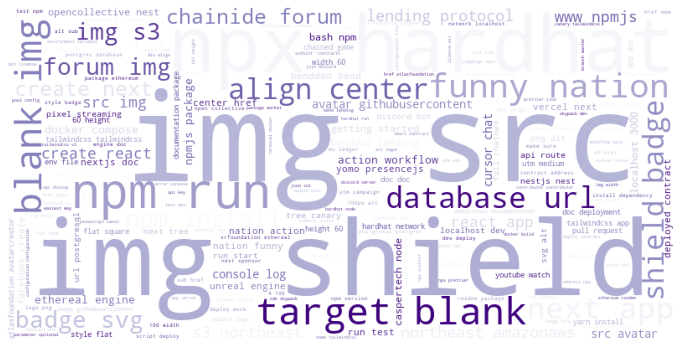

In [40]:
# Storing frequency into series
typescript_bigrams = pd.Series(nltk.ngrams(typescript.split(),2)).value_counts()
data = {k[0] + ' ' + k[1]: v for k, v in typescript_bigrams.to_dict().items()}
# Using wordcloud to visualize most common words
img = WordCloud(background_color='white', width=800, height=400, colormap = 'Purples_r').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

#### 🔸 HTML

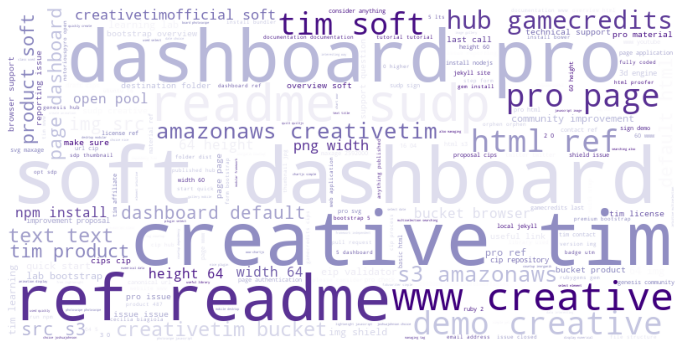

In [41]:
# Storing frequency into series
html_bigrams = pd.Series(nltk.ngrams(html.split(),2)).value_counts()
data = {k[0] + ' ' + k[1]: v for k, v in html_bigrams.to_dict().items()}
# Using wordcloud to visualize most common words
img = WordCloud(background_color='white', width=800, height=400, colormap = 'Purples_r').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

#### 🔸	other

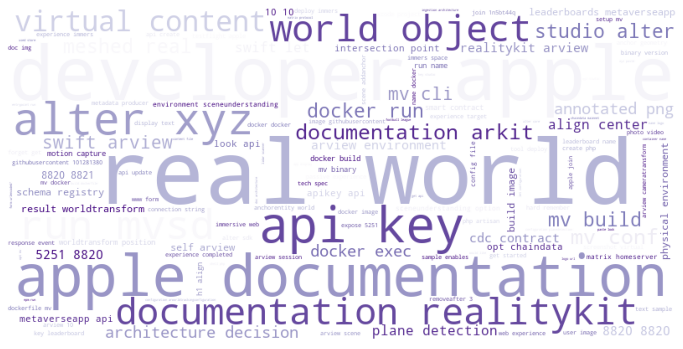

In [42]:
# Storing frequency into series
other_bigrams = pd.Series(nltk.ngrams(other.split(),2)).value_counts()
data = {k[0] + ' ' + k[1]: v for k, v in other_bigrams.to_dict().items()}
# Using wordcloud to visualize most common words
img = WordCloud(background_color='white', width=800, height=400, colormap = 'Purples_r').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

#### 🔸	Python

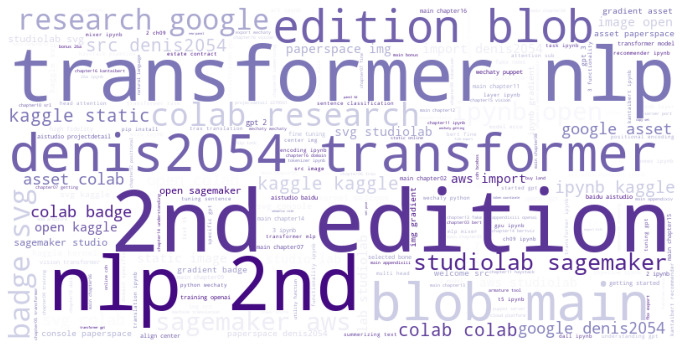

In [43]:
# Storing frequency into series
python_bigrams = pd.Series(nltk.ngrams(python.split(),2)).value_counts()
data = {k[0] + ' ' + k[1]: v for k, v in python_bigrams.to_dict().items()}
# Using wordcloud to visualize most common words
img = WordCloud(background_color='white', width=800, height=400, colormap = 'Purples_r').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

#### 🔸 Solidity

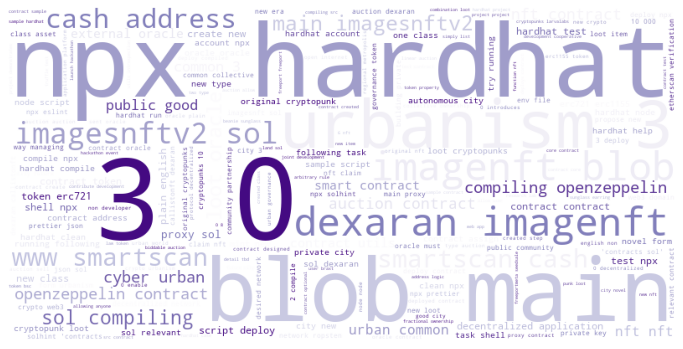

In [44]:
# Storing frequency into series
solidity_bigrams = pd.Series(nltk.ngrams(solidity.split(),2)).value_counts()
data = {k[0] + ' ' + k[1]: v for k, v in solidity_bigrams.to_dict().items()}
# Using wordcloud to visualize most common words
img = WordCloud(background_color='white', width=800, height=400, colormap = 'Purples_r').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

#### 🔸	CSS

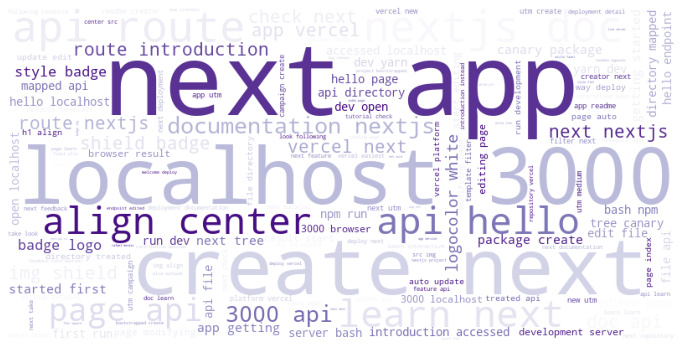

In [45]:
# Storing frequency into series
css_bigrams = pd.Series(nltk.ngrams(css.split(),2)).value_counts()
data = {k[0] + ' ' + k[1]: v for k, v in css_bigrams.to_dict().items()}
# Using wordcloud to visualize most common words
img = WordCloud(background_color='white', width=800, height=400, colormap = 'Purples_r').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

<h3><div class="alert alert-info">Takeaway: Yes, there are bigrams that uniquely identify a programming language.</div></h3/>

<h1 align="center">------------ 🔆 Modeling ------------</h1>

In [46]:
#Fit and transform data for analysis
# CVR Fit transform
cvr = CountVectorizer(max_features = 55, ngram_range=(1, 3))
words_train = cvr.fit_transform(train['readme_contents'])
X_train_a = pd.DataFrame(words_train.todense(), columns=cvr.get_feature_names_out())
# validate
words_validate = cvr.transform(validate['readme_contents'])
X_validate_a = pd.DataFrame(words_validate.todense(), columns=cvr.get_feature_names_out())
# Built Test
words_test = cvr.transform(test['readme_contents'])
X_test_a= pd.DataFrame(words_test.todense(), columns=cvr.get_feature_names_out())

## TF IDF

In [47]:
# Build Model
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 55, ngram_range=(1, 3))
words_train = tfidf.fit_transform(train['readme_contents'])
X_train_b = pd.DataFrame(words_train.todense(), columns=tfidf.get_feature_names_out())
words_validate = tfidf.transform(validate['readme_contents'])
X_validate_b = pd.DataFrame(words_validate.todense(), columns=tfidf.get_feature_names_out())
words_test = tfidf.transform(test['readme_contents'])
X_test_b = pd.DataFrame(words_test.todense(), columns=tfidf.get_feature_names_out())

In [48]:
# Build Target
y_train = train.language
y_validate = validate.language
y_test = test.language

# Modeling
- Decision Tree
- SVM (Support vector machine) classifier
- KNN (k-nearest neighbors) classifier 
- Naive Bayes classifier
- XGBoost

In [49]:
# Baseline
y_train.mode()
train['baseline_pred'] = 'text'
baseline_accuracy = (train.language == train.baseline_pred).mean()
print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 31.72%


In [50]:
# Validate Baseline
validate['baseline_pred'] = 'text'
baseline_accuracy = (validate.language == validate.baseline_pred).mean()
print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 31.67%


## Decision Tree - Bag of words

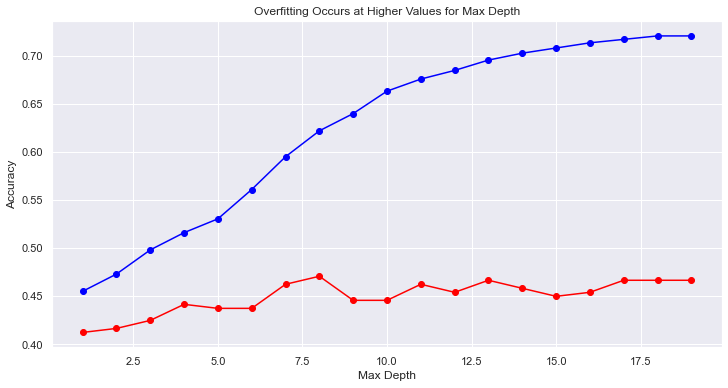

In [51]:
# max depth vs. model score, comparing training & validate datasets
metrics = []

for i in range(1, 20):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train_a, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train_a, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate_a, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df.sort_values(by = ['validate_accuracy', 'difference'], ascending = [False, True])

# Visualizing model performance as we change the max depth, check if there's overfitting
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', color = 'blue')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', color = 'red')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()


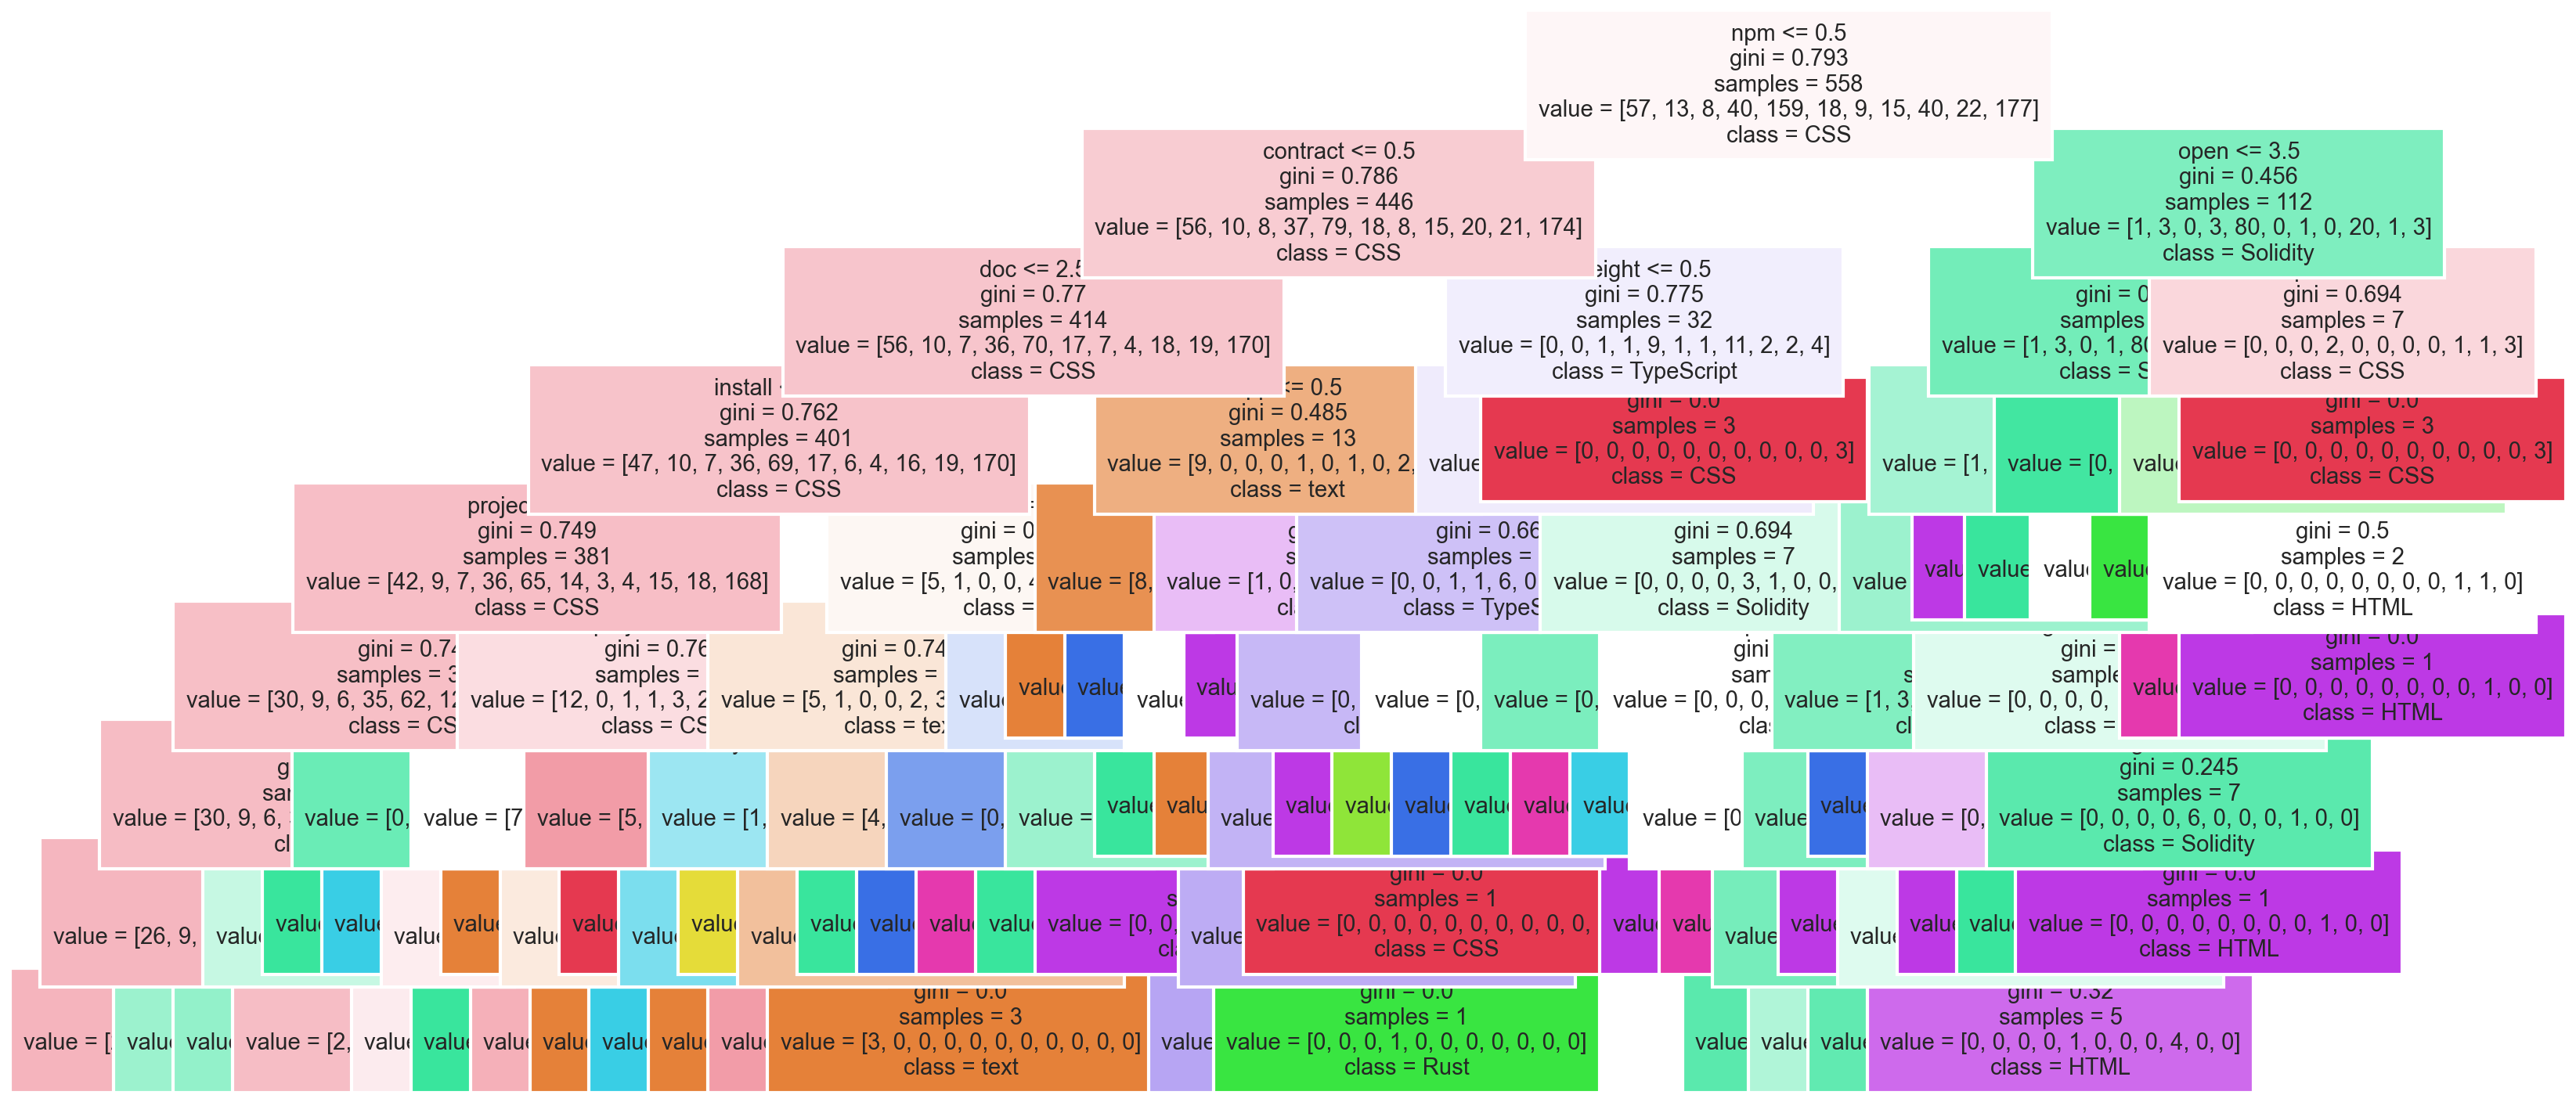

In [52]:
# Create the tree
tree = DecisionTreeClassifier(max_depth=8, random_state=123)

# Fit the model on train
tree = tree.fit(X_train_a, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree.predict(X_train_a)

# Visualizing the tree
fig, ax = plt.subplots(figsize=(12,6), dpi = 300)
plot_tree(tree, feature_names=X_train_a.columns, class_names=y_train.unique(), filled=True, fontsize=7)
plt.show()

In [53]:
print('Accuracy of Decision Tree classifier on training set: {:.3f}'
      .format(tree.score(X_train_a, y_train)))
print('Accuracy of Decision Tree classifier on validate set: {:.3f}'
      .format(tree.score(X_validate_a, y_validate)))

Accuracy of Decision Tree classifier on training set: 0.622
Accuracy of Decision Tree classifier on validate set: 0.471


## Decision Tree - TFIDF

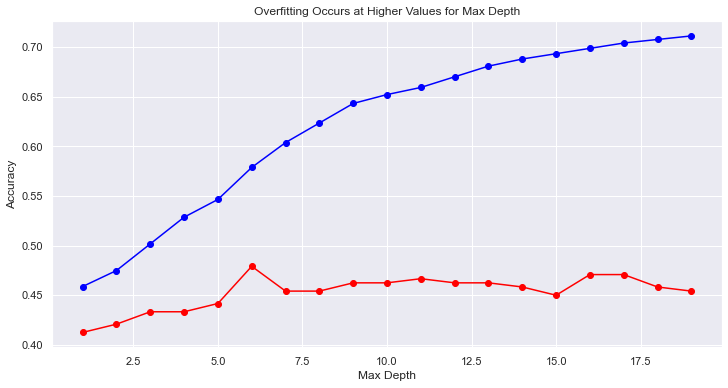

In [54]:
# max depth vs. model score, comparing training & validate datasets
metrics = []

for i in range(1, 20):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train_b, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train_b, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate_b, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df.sort_values(by = ['validate_accuracy', 'difference'], ascending = [False, True])

# Visualizing model performance as we change the max depth, check if there's overfitting
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', color = 'blue')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', color = 'red')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [55]:
# Stat Info
# Create the tree
tree = DecisionTreeClassifier(max_depth=6, random_state=123)

# Fit the model on train
tree = tree.fit(X_train_b, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree.predict(X_train_b)

print('Accuracy of Decision Tree classifier on training set: {:.3f}'
      .format(tree.score(X_train_b, y_train)))
print('Accuracy of Decision Tree classifier on validate set: {:.3f}'
      .format(tree.score(X_validate_b, y_validate)))

Accuracy of Decision Tree classifier on training set: 0.579
Accuracy of Decision Tree classifier on validate set: 0.479


## SVM (Support Vector Machine) Classifier - Bag of Words

In [56]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 2).fit(X_train_a, y_train)
svm_predictions = svm_model_linear.predict(X_validate_a)

# model accuracy for train and validate
accuracy = svm_model_linear.score(X_validate_a, y_validate)
print('Accuracy of SVM classifier on training set: {:.3f}'
      .format(svm_model_linear.score(X_train_a, y_train)))
print('Accuracy of SVM classifier on validate set: {:.3f}'
      .format(svm_model_linear.score(X_validate_a, y_validate)))

Accuracy of SVM classifier on training set: 0.625
Accuracy of SVM classifier on validate set: 0.454


## SVM (Support Vector Machine) Classifier - TFIDF

In [57]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C =3).fit(X_train_b, y_train)
svm_predictions = svm_model_linear.predict(X_validate_b)

# model accuracy for train and validate
accuracy = svm_model_linear.score(X_validate_a, y_validate)
print('Accuracy of SVM classifier on training set: {:.3f}'
      .format(svm_model_linear.score(X_train_b, y_train)))
print('Accuracy of SVM classifier on validate set: {:.3f}'
      .format(svm_model_linear.score(X_validate_b, y_validate)))

Accuracy of SVM classifier on training set: 0.538
Accuracy of SVM classifier on validate set: 0.458


## KNN - Bag of Words

In [58]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4).fit(X_train_a, y_train)

# model accuracy for train and validate 
print('Accuracy of SVM classifier on training set: {:.3f}'
      .format(knn.score(X_train_a, y_train)))
print('Accuracy of SVM classifier on validate set: {:.3f}'
      .format(knn.score(X_validate_a, y_validate)))

Accuracy of SVM classifier on training set: 0.541
Accuracy of SVM classifier on validate set: 0.412


## KNN - TFIDF

In [59]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train_b, y_train)

# model accuracy for train and validate 
print('Accuracy of SVM classifier on training set: {:.3f}'
      .format(knn.score(X_train_b, y_train)))
print('Accuracy of SVM classifier on validate set: {:.3f}'
      .format(knn.score(X_validate_b, y_validate)))

Accuracy of SVM classifier on training set: 0.538
Accuracy of SVM classifier on validate set: 0.446


## Naive Bayes classifier - Bag of Words

In [60]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train_a, y_train)

# model accuracy for X_test  
print('Accuracy of SVM classifier on training set: {:.3f}'
      .format(gnb.score(X_train_a, y_train)))
print('Accuracy of SVM classifier on validate set: {:.3f}'
      .format(gnb.score(X_validate_a, y_validate)))

Accuracy of SVM classifier on training set: 0.152
Accuracy of SVM classifier on validate set: 0.104


## Naive Bayes classifier - TFIDF

In [61]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train_b, y_train)

# model accuracy for X_test  
print('Accuracy of SVM classifier on training set: {:.3f}'
      .format(gnb.score(X_train_b, y_train)))
print('Accuracy of SVM classifier on validate set: {:.3f}'
      .format(gnb.score(X_validate_b, y_validate)))

Accuracy of SVM classifier on training set: 0.143
Accuracy of SVM classifier on validate set: 0.087


## XGBoost - Bag of Words

In [62]:
#XGBoost magic
from xgboost import XGBClassifier
def xg_model(x_train, y_train, x_validate, y_validate, x_test, y_test):

    # Fit model to training data
    model = XGBClassifier()
    
    model.fit(x_train, y_train)

    y_pred = model.predict(x_train)

    y_v_pred = model.predict(x_validate)

    y_t_pred = model.predict(x_test)
    print(classification_report(y_train, y_pred))

    print(classification_report(y_validate, y_v_pred))
    
    print(classification_report(y_test, y_t_pred))

In [63]:
# New XG Boost dictionary
new_y_train = y_train.map({'C': 0, 'CSS': 1, 'Go': 2, 'HTML': 3, 'Java':4, 'Python': 5, 'Rust': 6, 'Solidity': 7, 'TypeScript': 8, 'other': 9, 'text':10})
new_y_validate = y_validate.map({'C': 0, 'CSS': 1, 'Go': 2, 'HTML': 3, 'Java':4, 'Python': 5, 'Rust': 6, 'Solidity': 7, 'TypeScript': 8, 'other': 9, 'text':10})
new_y_test = y_test.map({'C': 0, 'CSS': 1, 'Go': 2, 'HTML': 3, 'Java':4, 'Python': 5, 'Rust': 6, 'Solidity': 7, 'TypeScript': 8, 'other': 9, 'text':10})

In [64]:
xg_model(X_train_a, new_y_train, X_validate_a, new_y_validate, X_test_a, new_y_test)

              precision    recall  f1-score   support

           0       0.97      0.58      0.73        57
           1       1.00      0.23      0.38        13
           2       1.00      0.25      0.40         8
           3       0.78      0.17      0.29        40
           4       0.95      0.74      0.83       159
           5       1.00      0.39      0.56        18
           6       1.00      1.00      1.00         9
           7       1.00      0.87      0.93        15
           8       1.00      0.70      0.82        40
           9       0.86      0.55      0.67        22
          10       0.55      0.98      0.70       177

    accuracy                           0.73       558
   macro avg       0.92      0.59      0.66       558
weighted avg       0.82      0.73      0.71       558

              precision    recall  f1-score   support

           0       0.25      0.21      0.23        24
           1       0.33      0.20      0.25         5
           2       0.00 

In [65]:
xg_model(X_train_b, new_y_train, X_validate_b, new_y_validate, X_test_b, new_y_test)

              precision    recall  f1-score   support

           0       0.94      0.58      0.72        57
           1       1.00      0.23      0.38        13
           2       1.00      0.25      0.40         8
           3       0.70      0.17      0.28        40
           4       0.95      0.74      0.83       159
           5       1.00      0.39      0.56        18
           6       1.00      1.00      1.00         9
           7       1.00      0.80      0.89        15
           8       1.00      0.68      0.81        40
           9       0.85      0.50      0.63        22
          10       0.55      0.98      0.70       177

    accuracy                           0.72       558
   macro avg       0.91      0.57      0.65       558
weighted avg       0.81      0.72      0.71       558

              precision    recall  f1-score   support

           0       0.30      0.25      0.27        24
           1       0.50      0.20      0.29         5
           2       0.00 

<h1 align="center">------------ 🔆 Conclusion ------------</h1>

- I don't understand the models... it's making my brain itch. 
- We did the thing!